In [1]:
import pandas as pd
import numpy as np

### LOAD DATASET

In [2]:
absent_data=pd.read_csv('absentee_data.csv')
dataset=absent_data.copy()
display(dataset)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


### PREPROCESS the data

In [4]:
dataset=dataset.drop(['ID'],axis=1)    #delets a set of rows or columns
dataset.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### HANDLING A CATAGORICAL FEATURE(reason for absence)

In [5]:
# Findind what types of datas are present in that feature(if sorted it can be easily observed)
sorted(dataset['Reason for Absence'].unique())   #array in sorted order : sorted(array)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [6]:
reason=pd.get_dummies(dataset['Reason for Absence'],drop_first=True)  #DROPING THE FIRST COLUMN(as if all others are zero it indicates the left one)
print(reason.info())
reason.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       700 non-null    uint8
 1   2       700 non-null    uint8
 2   3       700 non-null    uint8
 3   4       700 non-null    uint8
 4   5       700 non-null    uint8
 5   6       700 non-null    uint8
 6   7       700 non-null    uint8
 7   8       700 non-null    uint8
 8   9       700 non-null    uint8
 9   10      700 non-null    uint8
 10  11      700 non-null    uint8
 11  12      700 non-null    uint8
 12  13      700 non-null    uint8
 13  14      700 non-null    uint8
 14  15      700 non-null    uint8
 15  16      700 non-null    uint8
 16  17      700 non-null    uint8
 17  18      700 non-null    uint8
 18  19      700 non-null    uint8
 19  21      700 non-null    uint8
 20  22      700 non-null    uint8
 21  23      700 non-null    uint8
 22  24      700 non-null    uint8
 23  25      700 non

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
#As there are many types of reasons, we creating sets of the basic reasons
reason_disease=reason.loc[:,:14]                                     
reason_disease=reason_disease.max(axis=1)
reason_pregnancy=reason.loc[:,15:17].max(axis=1)
reason_poisoning=reason.loc[:,18:21].max(axis=1)
reason_checkup=reason.loc[:,22:].max(axis=1)

In [8]:
#as WE ARE ADDING THE FEATURES IN THE DATASET THEN FOR PREVENTING MULTICOLLINEARITY WE HAVE TO:
dataset=dataset.drop(['Reason for Absence'],axis=1)
dataset.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [9]:
dataset=pd.concat([dataset,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup],axis=1)
#concate function is from pandas
dataset.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [10]:
dataset.columns.values    

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [11]:
#Changing the column names
renamed_columns=['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'reason_disease', 'reason_pregnancy', 'reason_poisoning', 'reason_checkup']
dataset.columns=renamed_columns
dataset.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [12]:
#reorderin the columns
ordered_columns=['reason_disease', 'reason_pregnancy', 'reason_poisoning', 'reason_checkup','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
dataset=dataset[ordered_columns]
dataset.head()

,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [13]:
dataset_c1=dataset.copy()  

In [14]:
#checking the type of the date feature 
type(dataset_c1['Date'][0]) 

str

In [15]:
#as we see that the date is of series(like list) type containing str, so not regognisable by pandas , so CONVERT IT to timestrap
dataset_c1['Date']=pd.to_datetime(dataset_c1['Date'],format='%d/%m/%Y')

In [16]:
display(dataset_c1)

,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2


In [17]:
months=[]
for i in range(dataset_c1.shape[0]):
    months.append(dataset_c1['Date'][i].month)       #extracting month from timestrap: date.month
dataset_c1['month']=months
dataset_c1.head()

,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [18]:
def to_day(dates):
    return dates.weekday()
dataset_c1['day']=dataset_c1['Date'].apply(to_day)
dataset_c1.head()

,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month,day
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [19]:
dataset_c1=dataset_c1.drop(['Date'],axis=1)
dataset_c1.columns.values

array(['reason_disease', 'reason_pregnancy', 'reason_poisoning',
       'reason_checkup', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'month', 'day'],
      dtype=object)

In [20]:
ordered_columns=['reason_disease', 'reason_pregnancy', 'reason_poisoning',
       'reason_checkup', 'month', 'day', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
dataset_c1=dataset_c1[ordered_columns]
dataset_c1.head()

,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup,month,day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [21]:
dataset_c2=dataset_c1.copy()

In [22]:
dataset_c2['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [23]:
dataset_c2['Education'].value_counts()      #counts all the unique values:  array.value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [24]:
#we can see the majority of the value 1, so do it binary(educated,uneducated) by some what balancing:
dataset_c2['Education']=dataset_c2['Education'].map({1:0,2:1,3:1,4:1})
#ADVICE: place all the dummy variables together
ordered_columns=['reason_disease', 'reason_pregnancy', 'reason_poisoning',
       'reason_checkup', 'Education', 'month', 'day', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Children', 'Pets', 'Absenteeism Time in Hours']
dataset_c2=dataset_c2[ordered_columns]
dataset_c2.head()

,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup,Education,month,day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,0,7,1,289,36,33,239.554,30,2,1,4
1,0,0,0,0,0,7,1,118,13,50,239.554,31,1,0,0
2,0,0,0,1,0,7,2,179,51,38,239.554,31,0,0,2
3,1,0,0,0,0,7,3,279,5,39,239.554,24,2,0,4
4,0,0,0,1,0,7,3,289,36,33,239.554,30,2,1,2


### INPUT DATA DISTRIBUTION

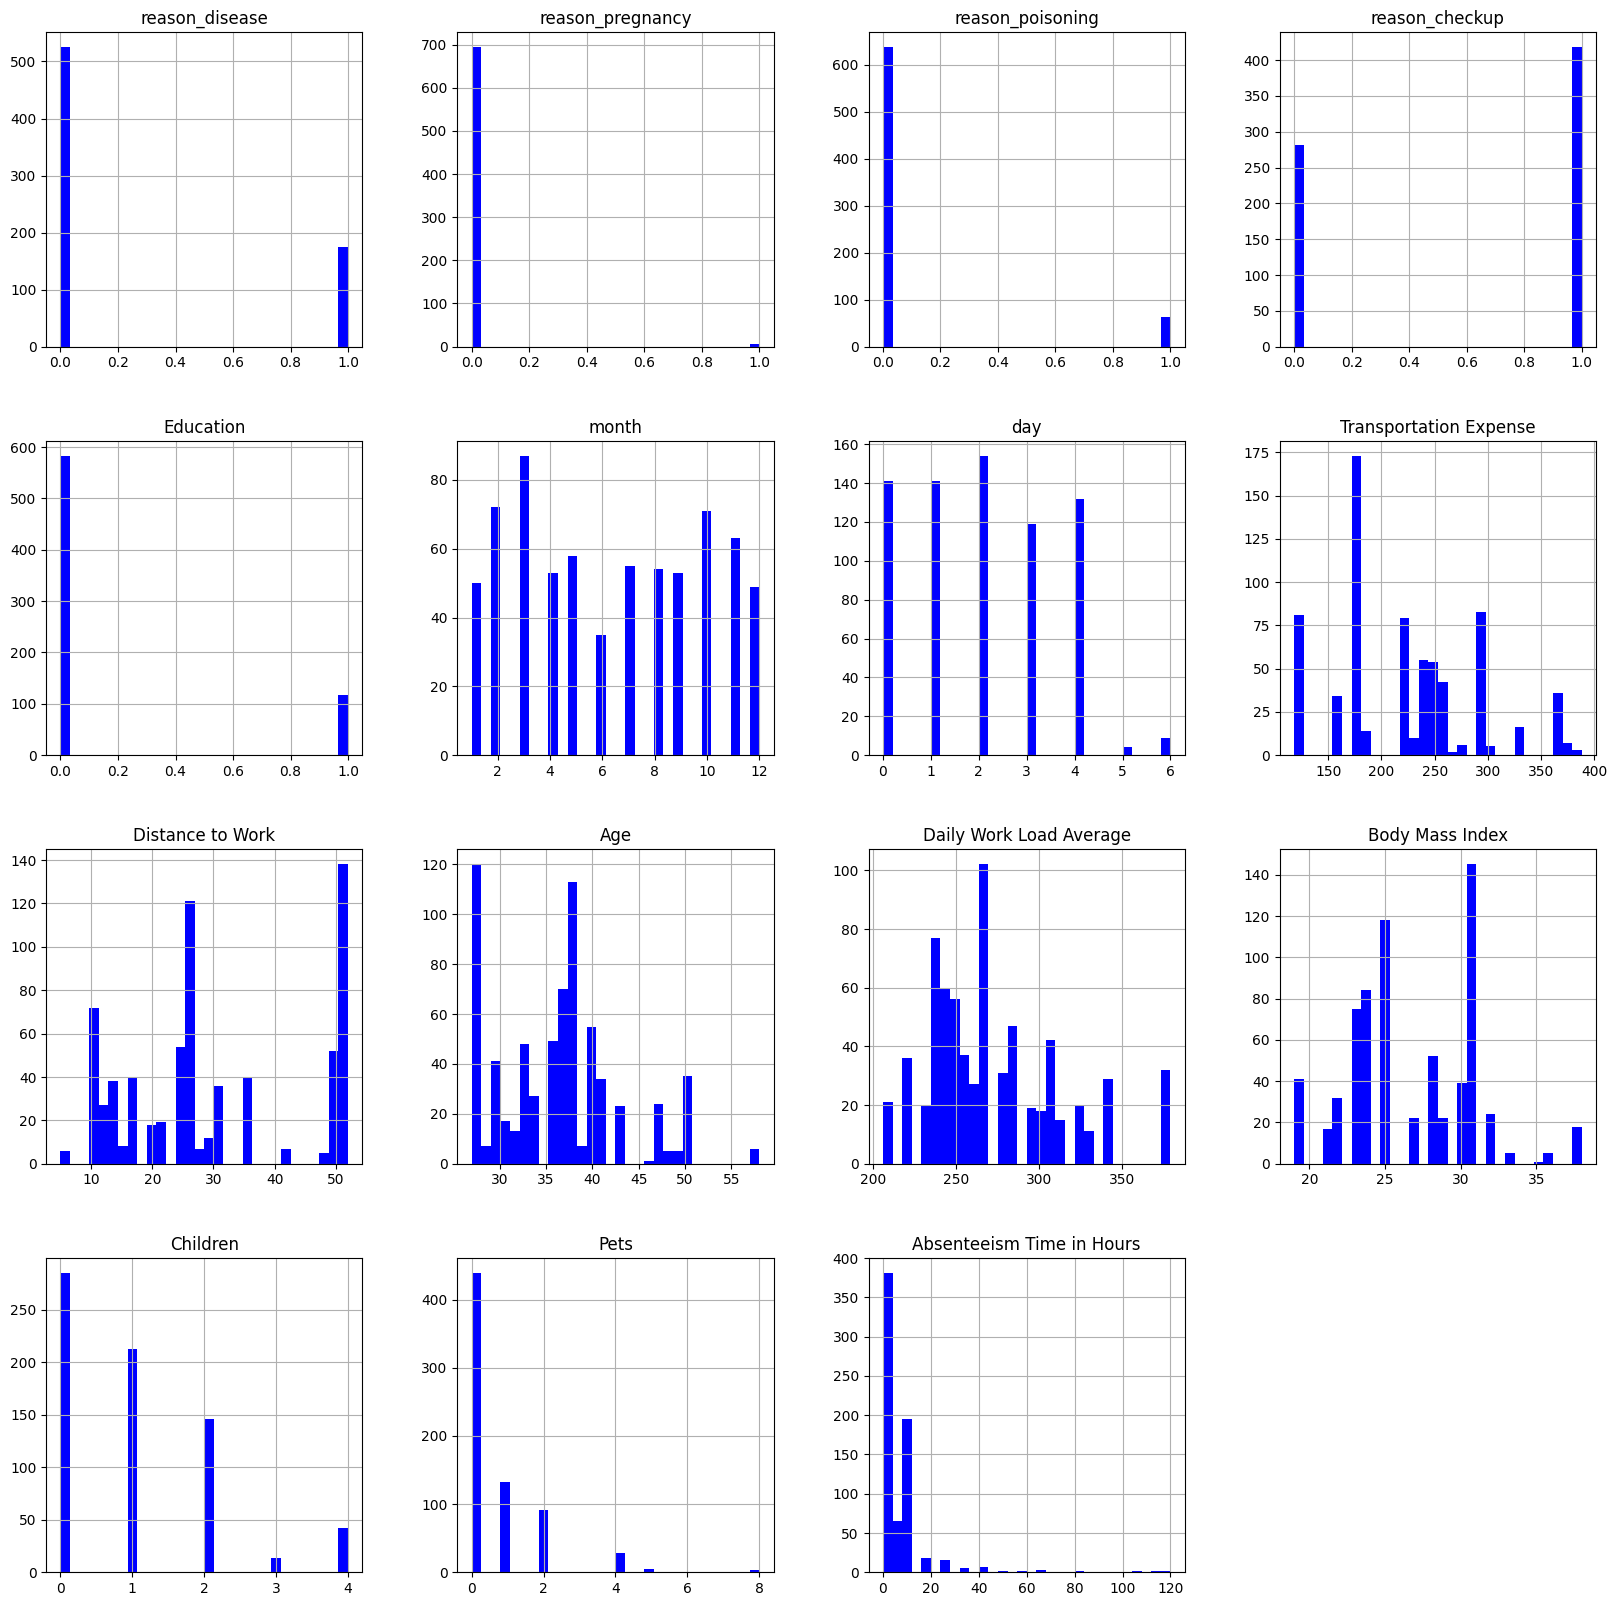

In [25]:
data=dataset_c2   #NOW THE DATA ID FULLY PREPROCESSED
data.hist(bins= 30, figsize=(20,20), color = 'b');

### NOW WE HAVE TO BUILD A MODEL:
  - balance the data by comparing the target value ratio
  - train test split

In [26]:
# as our target feature absent in hours we should balance it accroding to absent or not ,so:
data['absent']=np.where(data['Absenteeism Time in Hours']>data['Absenteeism Time in Hours'].median(),1,0)
data.head()

,reason_disease,reason_pregnancy,reason_poisoning,reason_checkup,Education,month,day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,Absenteeism Time in Hours,absent
0,0,0,0,1,0,7,1,289,36,33,239.554,30,2,1,4,1
1,0,0,0,0,0,7,1,118,13,50,239.554,31,1,0,0,0
2,0,0,0,1,0,7,2,179,51,38,239.554,31,0,0,2,0
3,1,0,0,0,0,7,3,279,5,39,239.554,24,2,0,4,1
4,0,0,0,1,0,7,3,289,36,33,239.554,30,2,1,2,0


In [27]:
data=data.drop(['Absenteeism Time in Hours'],axis=1)  
print(np.sum(data['absent'])/data.shape[0])

0.45571428571428574


In [28]:
# 45% is a acceptable balance
input_data=data.iloc[:,:-1]
target_data=data.iloc[:,-1:]
#scale the input data
from sklearn.preprocessing import StandardScaler
absent_scaler=StandardScaler()
unscaled_input_data=input_data
#WARNING: DO NOT SCALE THE DUMMY VALUES  ---> input_data=absent_scaler.transform(input_data)
dummies=unscaled_input_data.iloc[:,:5]
scalable=unscaled_input_data.iloc[:,5:]
absent_scaler.fit(scalable)
print(scalable.columns.values)
print(dummies.columns.values)
scaled=absent_scaler.transform(scalable)
input_data=np.column_stack((dummies,scaled))
print(input_data.shape)

['month' 'day' 'Transportation Expense' 'Distance to Work' 'Age'
 'Daily Work Load Average' 'Body Mass Index' 'Children' 'Pets']
['reason_disease' 'reason_pregnancy' 'reason_poisoning' 'reason_checkup'
 'Education']
(700, 14)


In [29]:
from sklearn.model_selection import train_test_split
#by_default train_size=0.75(preferable 0.8), shuffle is by default True, for any int in random state it will give same shuffled data if the in value is same 

input_train,input_test,target_train,target_test=train_test_split(input_data,target_data,
                                                                 train_size=0.8,shuffle=True,random_state=44)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(input_train,target_train)
print(model.score(input_train,target_train))               #Accuracy of the model

features=unscaled_input_data.columns.values
coefficients=model.coef_                                    #it returns a column
intercept=model.intercept_
summary=pd.DataFrame(columns=['features'],data=features)
summary['values']=np.transpose(coefficients)               # but,it takes array so we have to transpose it 
summary

0.7535714285714286


D:\Anaconda\anaconda3\envs\py3_TF2.0\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,features,values
0,reason_disease,2.670897
1,reason_pregnancy,0.824860
2,reason_poisoning,2.984813
3,reason_checkup,0.917237
4,Education,-0.029404
5,month,0.120935
6,day,-0.204841
7,Transportation Expense,0.552318
8,Distance to Work,-0.027335
9,Age,-0.210340


In [30]:
#insert the intercept
summary.loc[14]=['intercept',intercept[0]]
summary

,features,values
0,reason_disease,2.670897
1,reason_pregnancy,0.824860
2,reason_poisoning,2.984813
3,reason_checkup,0.917237
4,Education,-0.029404
5,month,0.120935
6,day,-0.204841
7,Transportation Expense,0.552318
8,Distance to Work,-0.027335
9,Age,-0.210340


In [31]:
summary['odds_ratio']=np.exp(summary['values'])           
#as Logistic Regression we have to compare odds_ratio(exponential value of the weights of that feature)
summary=summary.sort_values('odds_ratio',ascending=False)
summary

,features,values,odds_ratio
2,reason_poisoning,2.984813,19.782795
0,reason_disease,2.670897,14.452927
3,reason_checkup,0.917237,2.502366
1,reason_pregnancy,0.824860,2.281561
7,Transportation Expense,0.552318,1.737276
12,Children,0.422120,1.525191
11,Body Mass Index,0.180749,1.198115
5,month,0.120935,1.128552
8,Distance to Work,-0.027335,0.973036
4,Education,-0.029404,0.971024


### Distance to work, Education and Daily work load average featrures are not so effective predictors , so we can drop them

In [32]:
#calculating the test accuracy
model.score(input_test,target_test)

0.8214285714285714

### Logistic Regression is based on probability. What gets predicted by a binary classifier is actually the probability that the label is true P(y), and the probability that the label is false 1-P(y).

In [33]:
#calculating the the probability to be absent in the test set
model.predict_proba(input_test)
# the first column shows the probability of a particular observation to be 0, while the second one - to be 1

array([[0.84211562, 0.15788438],
       [0.84401848, 0.15598152],
       [0.78676883, 0.21323117],
       [0.45591352, 0.54408648],
       [0.82139896, 0.17860104],
       [0.30571409, 0.69428591],
       [0.23051311, 0.76948689],
       [0.64201027, 0.35798973],
       [0.47065992, 0.52934008],
       [0.78581019, 0.21418981],
       [0.27268745, 0.72731255],
       [0.82217447, 0.17782553],
       [0.1742453 , 0.8257547 ],
       [0.22645532, 0.77354468],
       [0.22181075, 0.77818925],
       [0.90531471, 0.09468529],
       [0.63038025, 0.36961975],
       [0.18944199, 0.81055801],
       [0.44529479, 0.55470521],
       [0.2535632 , 0.7464368 ],
       [0.81975066, 0.18024934],
       [0.21880958, 0.78119042],
       [0.57822176, 0.42177824],
       [0.25223572, 0.74776428],
       [0.82448727, 0.17551273],
       [0.11963686, 0.88036314],
       [0.54366499, 0.45633501],
       [0.82689695, 0.17310305],
       [0.16570016, 0.83429984],
       [0.46277712, 0.53722288],
       [0.